<a href="https://colab.research.google.com/github/gunacodee/DEV/blob/main/Ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


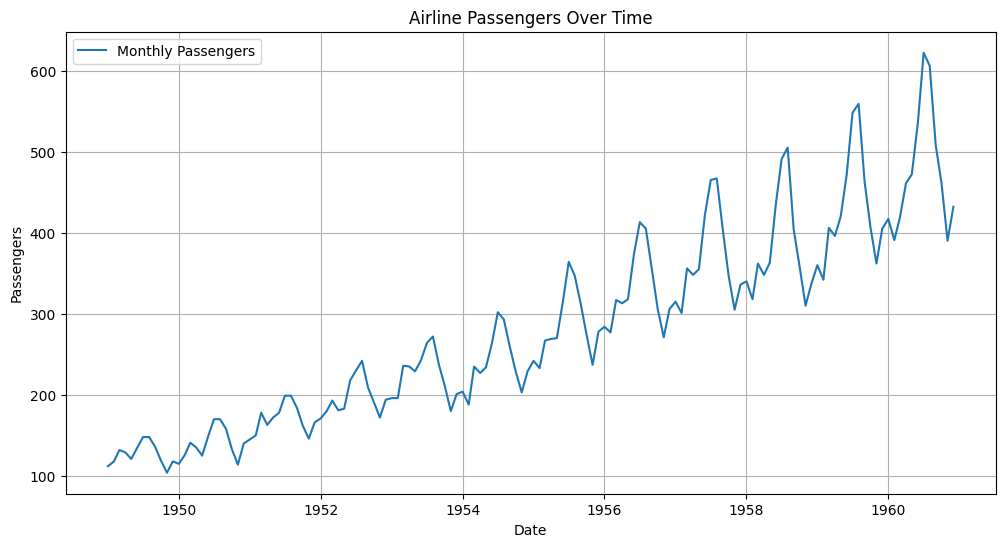

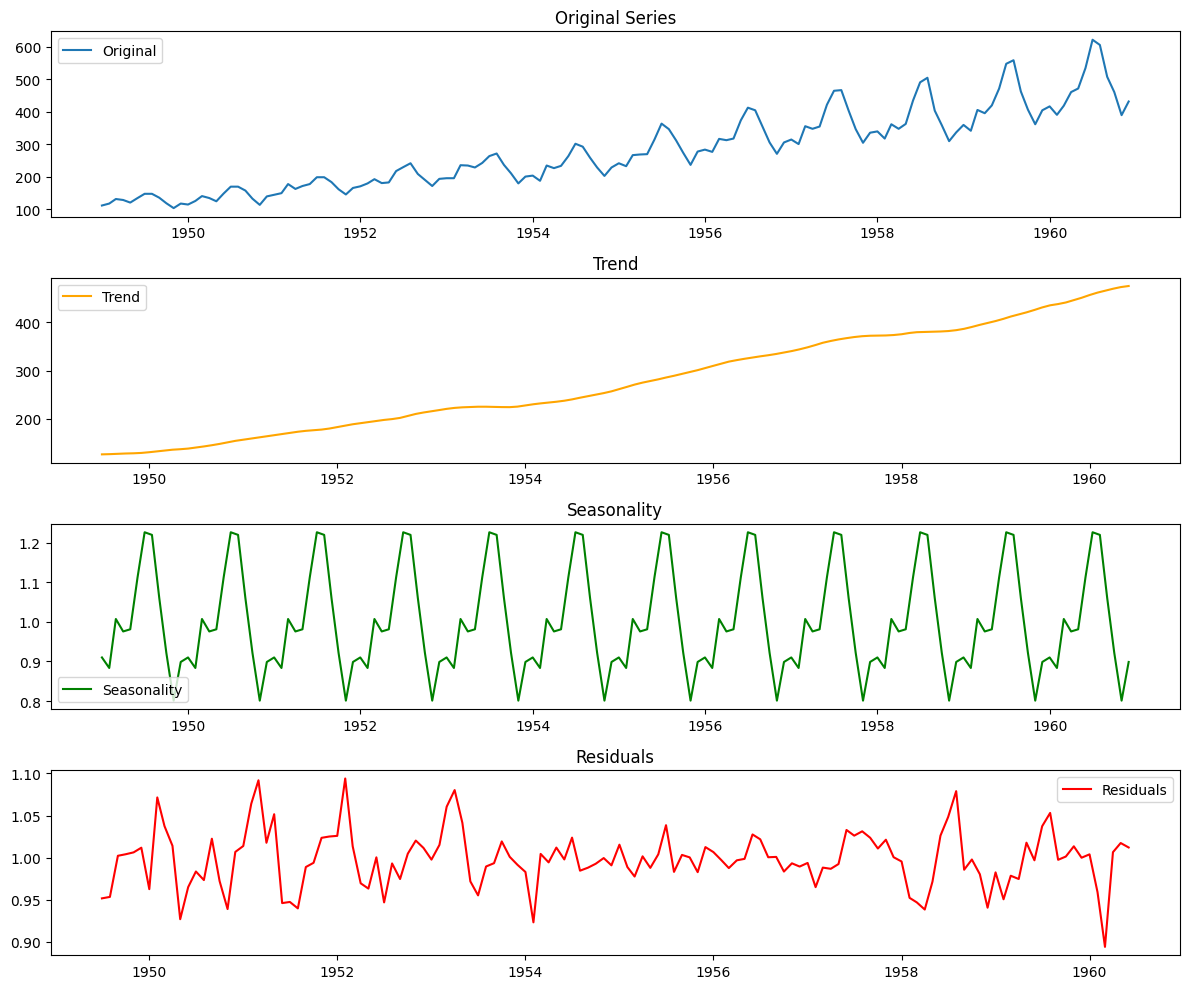

<Figure size 1000x400 with 0 Axes>

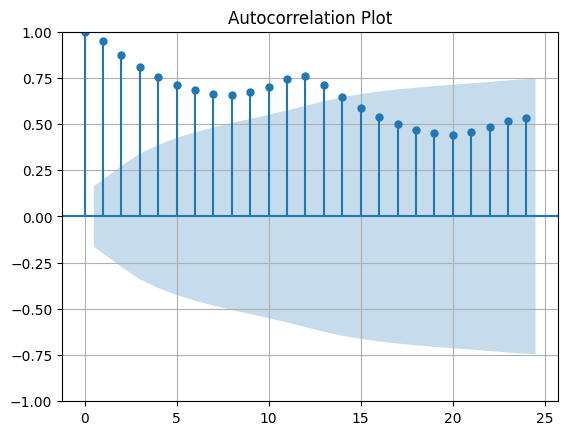

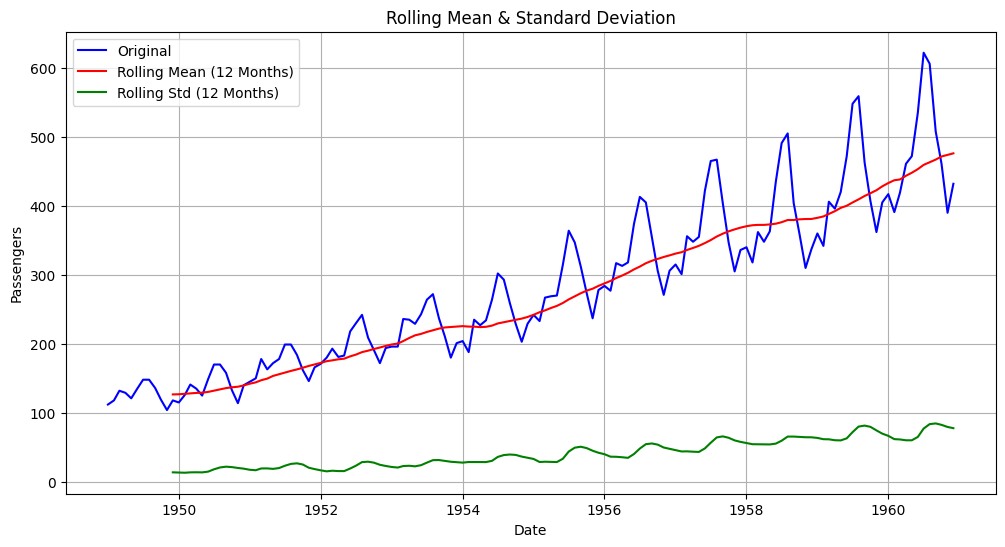

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Step 2: Convert date and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 3: Describe and plot
print(df.describe())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Monthly Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Decomposition
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4, 1, 1)
plt.plot(df['Passengers'], label='Original')
plt.title('Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Autocorrelation
plt.figure(figsize=(10, 4))
plot_acf(df['Passengers'], lags=24)
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()

# Step 6: Rolling Statistics
rolling_mean = df['Passengers'].rolling(window=12).mean()
rolling_std = df['Passengers'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (12 Months)', color='red')
plt.plot(rolling_std, label='Rolling Std (12 Months)', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.show()
